In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
df3 = pd.read_csv('../utils/Marvel_Comics.csv')
df3

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,Free
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,Free
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free
...,...,...,...,...,...,...,...,...,...,...,...,...
34987,Ziggy Pig - Silly Seal Comics (2019),(2019),Ziggy Pig - Silly Seal Comics (2019) #1,"March 06, 2019",NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,$3.99
34988,Zombie (2006),(2006),Zombie (2006) #4,"December 20, 2006",With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99
34989,Zombie (2006),(2006),Zombie (2006) #3,"November 29, 2006",The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99
34990,Zombie (2006),(2006),Zombie (2006) #2,"October 25, 2006","For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99


In [6]:
# 3. EXPLORACIÓN INICIAL
print(df3.shape)
print(df3.info())
print(df3.describe(include='all'))


(34992, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34992 entries, 0 to 34991
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comic_name         34992 non-null  object
 1   active_years       34992 non-null  object
 2   issue_title        34466 non-null  object
 3   publish_date       34466 non-null  object
 4   issue_description  30395 non-null  object
 5   penciler           25482 non-null  object
 6   writer             27595 non-null  object
 7   cover_artist       12255 non-null  object
 8   Imprint            11684 non-null  object
 9   Format             32894 non-null  object
 10  Rating             12619 non-null  object
 11  Price              32894 non-null  object
dtypes: object(12)
memory usage: 3.2+ MB
None
                         comic_name   active_years  \
count                         34992          34992   
unique                         4935            412   
top     Uncan

In [11]:
## 4.1 Limpiar columna de precios
# Reemplazar valores no numéricos como 'Free' por NaN
df3['Price'] = df3['Price'].replace({'Free': np.nan, '[\\$,]': ''}, regex=True)

# Convertir a tipo float (ahora los valores no numéricos se han convertido en NaN)
df3['Price'] = pd.to_numeric(df3['Price'], errors='coerce')

# Verificamos los valores nulos
print(df3['Price'].isnull().sum())

## 4.2 Convertir fechas a formato datetime
df3['publish_date'] = pd.to_datetime(df3['publish_date'], errors='coerce')

## 4.3 Valores nulos en otras columnas
print(df3.isnull().sum())

17234
comic_name               0
active_years             0
issue_title            526
publish_date          1069
issue_description     4597
penciler              9510
writer                7397
cover_artist         22737
Imprint              23308
Format                2098
Rating               22373
Price                17234
dtype: int64


In [12]:
# Imputación (ejemplo: sustituimos nulos de 'Rating' por 'Unrated')
df3['Rating'] = df3['Rating'].fillna('Unrated')

In [13]:
df3

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,2016-04-01,The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,NaN
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,2016-08-10,"It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,Unrated,NaN
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,2016-02-10,Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,NaN
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,2016-06-29,Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,Unrated,NaN
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,2016-06-15,Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,Unrated,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
34987,Ziggy Pig - Silly Seal Comics (2019),(2019),Ziggy Pig - Silly Seal Comics (2019) #1,2019-03-06,NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,3.99
34988,Zombie (2006),(2006),Zombie (2006) #4,2006-12-20,With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,3.99
34989,Zombie (2006),(2006),Zombie (2006) #3,2006-11-29,The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,3.99
34990,Zombie (2006),(2006),Zombie (2006) #2,2006-10-25,"For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,3.99


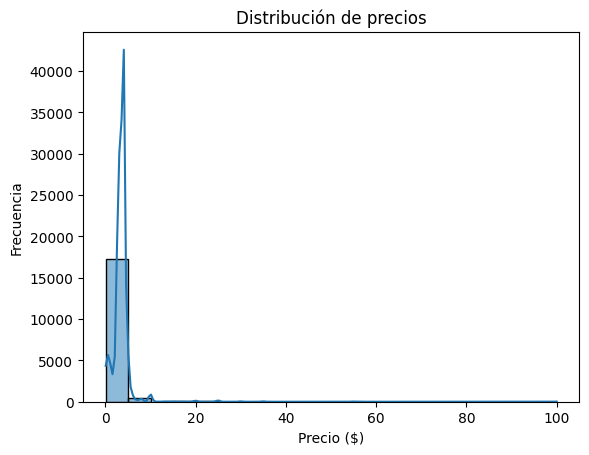

In [15]:

## 5.1 Precios
sns.histplot(df3['Price'], bins=20, kde=True)
plt.title('Distribución de precios')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()

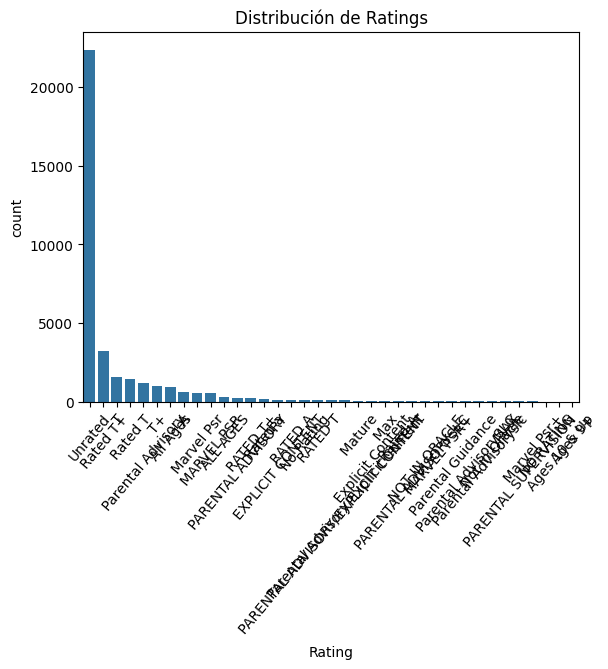

In [17]:
## 5.2 Ratings
sns.countplot(data=df3, x='Rating', order=df3['Rating'].value_counts().index)
plt.title('Distribución de Ratings')
plt.xticks(rotation=50)
plt.show();

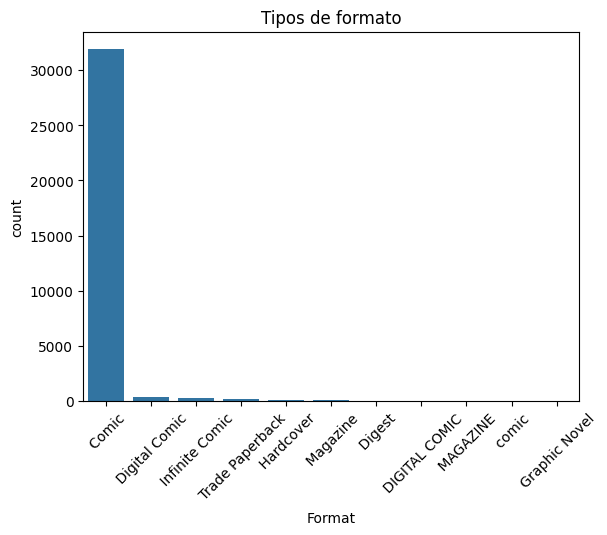

In [18]:
## 5.3 Format
sns.countplot(data=df3, x='Format', order=df3['Format'].value_counts().index)
plt.title('Tipos de formato')
plt.xticks(rotation=45)
plt.show();

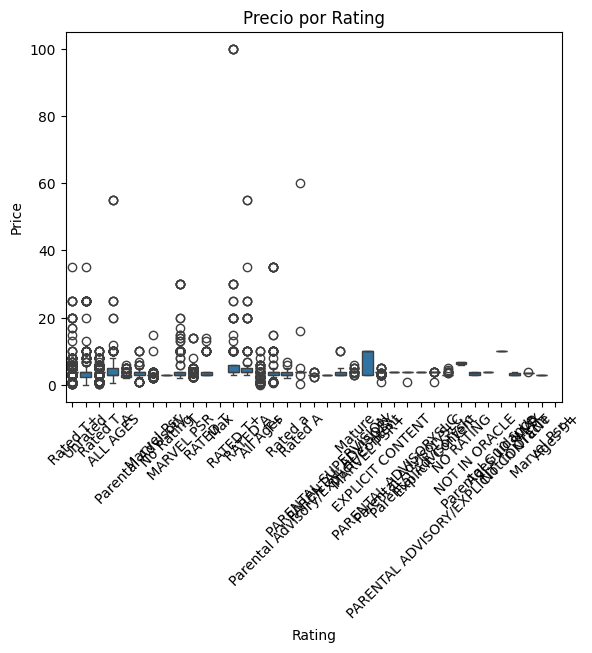

In [19]:
## 6.1 Precio medio por Rating
sns.boxplot(data=df3, x='Rating', y='Price')
plt.title('Precio por Rating')
plt.xticks(rotation=45)
plt.show();

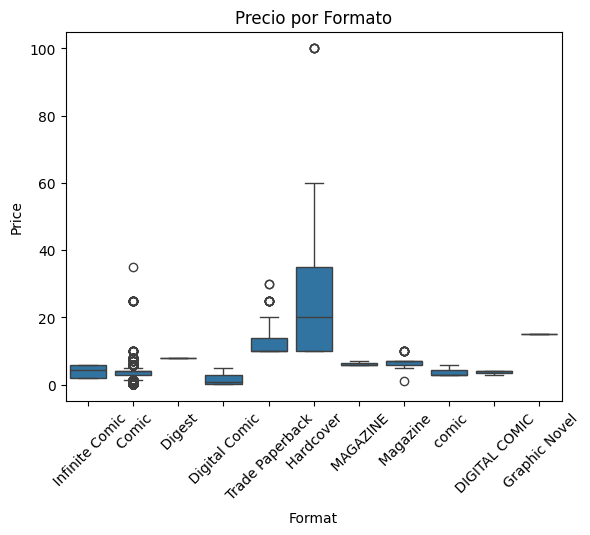

In [20]:
## 6.2 Precio medio por Formato
sns.boxplot(data=df3, x='Format', y='Price')
plt.title('Precio por Formato')
plt.xticks(rotation=45)
plt.show();

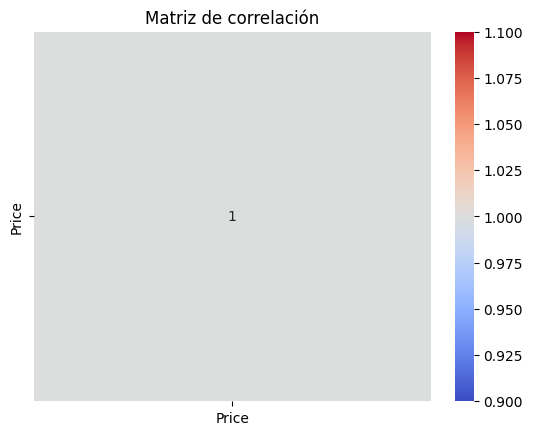

In [21]:
## 6.3 Correlación (si hay otras variables numéricas)
numeric_cols = df3.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show();

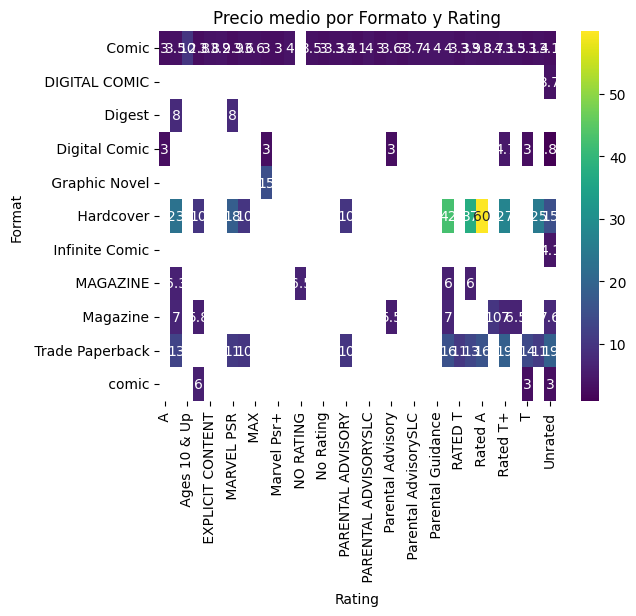

In [22]:
# 7. ANÁLISIS MULTIVARIANTE

## 7.1 Precio medio agrupado por Format y Rating
pivot = df3.pivot_table(values='Price', index='Format', columns='Rating', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.title('Precio medio por Formato y Rating')
plt.show();

In [23]:
df3["Rating"].unique()

array([' Rated T+', 'Unrated', ' Rated T', ' ALL AGES', ' A',
       ' Parental Advisory', ' Marvel Psr', ' No Rating', ' MARVEL PSR',
       ' T', ' RATED T', ' Max', ' RATED T+', ' RATED A', ' All Ages',
       ' T+', ' Rated a', ' Rated A',
       ' Parental Advisory/Explicit Content', ' PARENTAL SUPERVISION',
       ' PARENTAL ADVISORY', ' Mature', ' MARVEL PSR+',
       ' EXPLICIT CONTENT', ' PARENTAL ADVISORYSLC',
       ' Parental AdvisorySLC', ' Parental Advisoryslc',
       ' Explicit Content', ' PARENTAL ADVISORY/EXPLICIT CONTENT',
       ' NO RATING', ' NOT IN ORACLE', ' Parental Guidance',
       ' Ages 10 & Up', ' Not in Oracle', ' MAX', ' Marvel Psr+',
       ' Ages 9+'], dtype=object)